In [2]:
import nest_asyncio
import numpy as np
import matplotlib.pyplot as plt

from benchmark.application import app, types, config
from benchmark.application.types import BenchmarkParams

nest_asyncio.apply()

benchmark_types = [types.BenchmarkTypes.API, types.BenchmarkTypes.MSG]
runtime_list = [10 + (5 * i) for i in range(4)]

bench_param_list = [
    BenchmarkParams(
        benchmark_type = bench_type,
        complexity_factor = 100,
        memory_overhead = 0,
        requests_number = None,
        runtime = runtime,
        batch_size = 500,
        total_progress=True,
    ) for runtime in runtime_list for bench_type in benchmark_types
]

results = [app.run_benchmark(param, config.Env.DOCKER) for param in bench_param_list]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

Total: 0it [00:00, ?it/s]

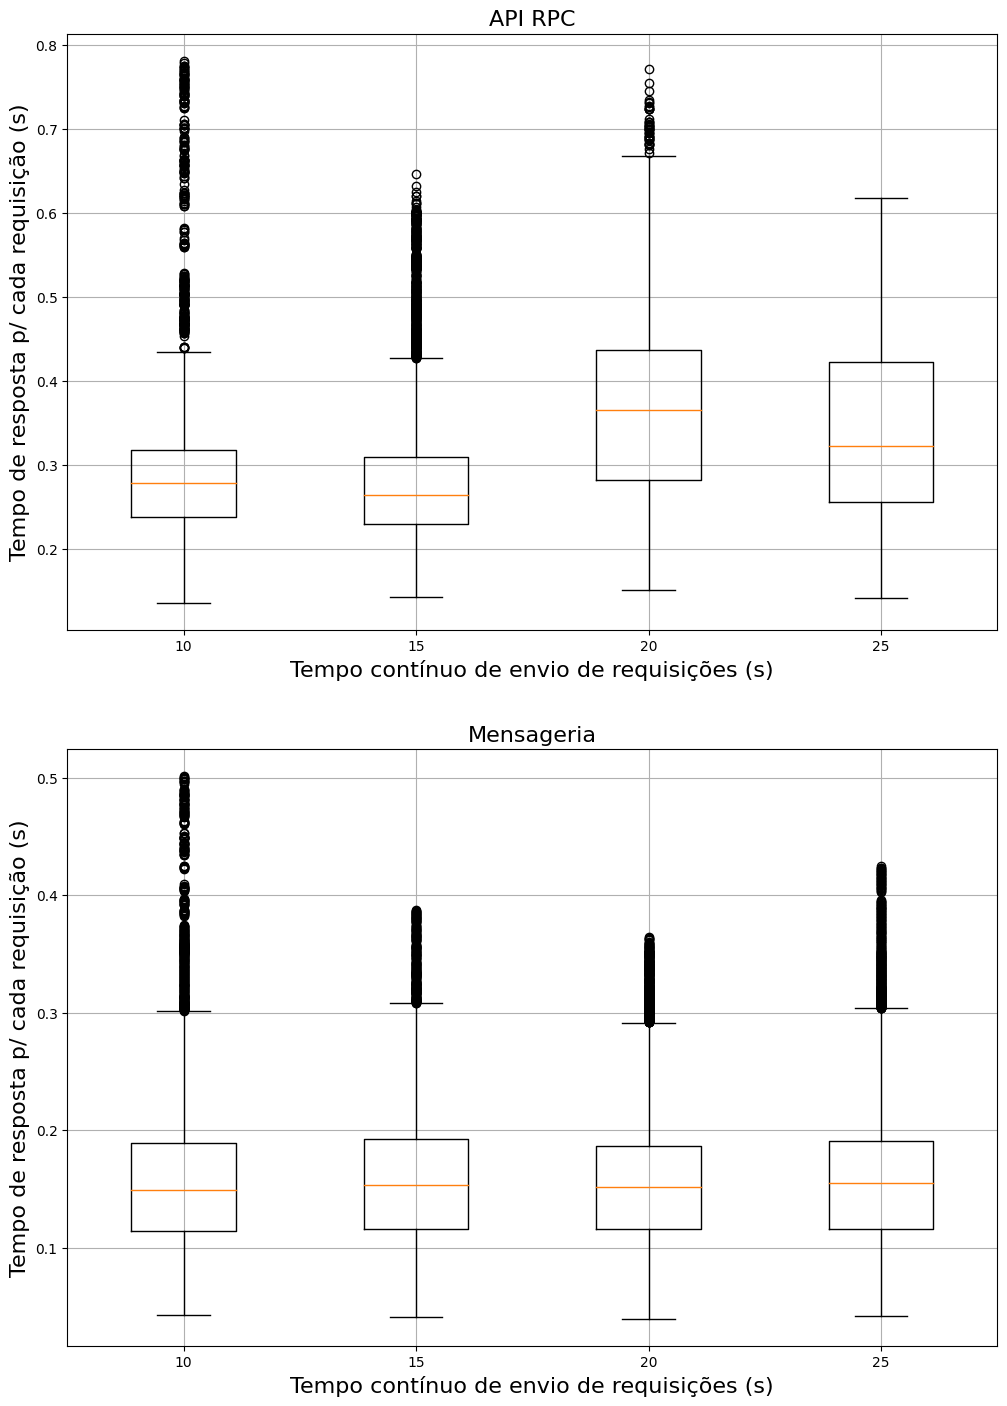

In [11]:
elapsed_times = [[t.end - t.start for t in result.response_list] for result in results]

fig, axs = plt.subplots(nrows=2, figsize=(12, 16))

axs[0].boxplot(elapsed_times[::2], labels=runtime_list)
axs[0].set_title("API RPC", fontsize=16)
axs[0].set_xlabel("Tempo contínuo de envio de requisições (s)", fontsize=16)
axs[0].set_ylabel("Tempo de resposta p/ cada requisição (s)", fontsize=16)
axs[0].grid(True)

axs[1].boxplot(elapsed_times[1::2], labels=runtime_list)
axs[1].set_title("Mensageria", fontsize=16)
axs[1].set_xlabel("Tempo contínuo de envio de requisições (s)", fontsize=16)
axs[1].set_ylabel("Tempo de resposta p/ cada requisição (s)", fontsize=16)
axs[1].grid(True)

fig.subplots_adjust(top=0.93, hspace=.2, wspace=.2)


plt.show()

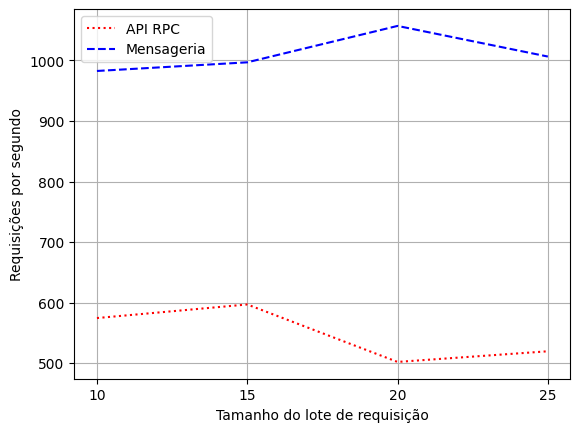

In [5]:
def get_requests_per_second(results):
    return [len(result.response_list)/result.elapsed_time for result in results]

plt.plot(runtime_list, get_requests_per_second(results[::2]), ':r', label="API RPC")
plt.plot(runtime_list, get_requests_per_second(results[1::2]), '--b', label="Mensageria")

plt.legend()
plt.xlabel("Tempo contínuo de envio de requisições (s)")
plt.ylabel("Requisições por segundo")

plt.grid(True)
plt.xticks(runtime_list)
plt.show()

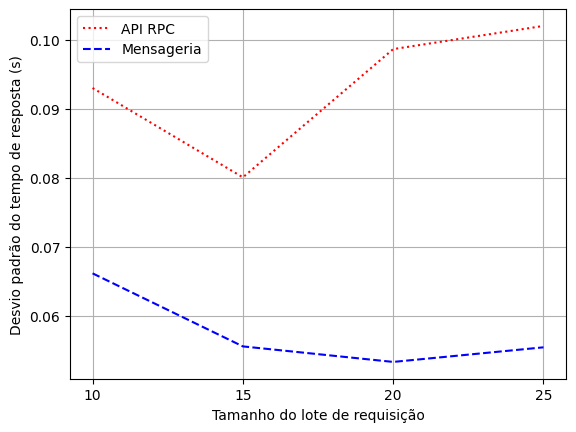

In [6]:
def get_standard_deviation(results):
    return [np.std(np.asarray(result)) for result in results]

plt.plot(
    runtime_list, get_standard_deviation(elapsed_times[::2]), ':r', label="API RPC"
)
plt.plot(
    runtime_list, get_standard_deviation(elapsed_times[1::2]), '--b', label="Mensageria"
)

plt.legend()
plt.xlabel("Tempo contínuo de envio de requisições (s)")
plt.ylabel("Desvio padrão do tempo de resposta (s)")

plt.grid(True)
plt.xticks(runtime_list)
plt.show()
